<h1>Import Lib& Font Setting</h1>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from datetime import datetime
import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

plt.rcParams['font.family']='Malgun Gothic'

# Data preprocessing
### Data Load(데이터 합치기)

In [99]:
df13 = pd.read_csv('2013년_최종.csv')
df14 = pd.read_csv('2014년_최종.csv')
df15 = pd.read_csv('2015년_최종.csv')
df16 = pd.read_csv('2016년_최종.csv')
df17 = pd.read_csv('2017년_최종.csv')
df18 = pd.read_csv('2018년_최종.csv')
df19 = pd.read_csv('2019년_최종.csv')
df20 = pd.read_csv('2020년_최종.csv')
dfw = pd.read_csv('기상자료_최종.csv')

In [100]:
df = pd.concat([df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

In [105]:
df.to_csv('13_20.csv',index=False,encoding='utf-8-sig')

In [ ]:
df = pd.read_csv('13_20.csv')

In [104]:
df = df.drop('PM25',axis=1)

In [116]:
dfw.rename(columns = {'일시':'측정일시'},inplace=True)

### Missing Value processing

In [123]:
dfw['강수량(mm)']=dfw['강수량(mm)'].fillna(0)

In [127]:
dfw['일사(MJ/m2)']=dfw['일사(MJ/m2)'].fillna(0)

In [137]:
dfw = dfw.fillna(method='ffill') # 직전 시간대의 데이터 삽입

In [113]:
dfa = pd.merge(df,dfw, how='outer',on='측정일시')

TypeError: Can only merge Series or DataFrame objects, a <class 'NoneType'> was passed

In [151]:
dfa = dfa.dropna() # 12월 31일 24시 데이터 제거

In [153]:
dfa = dfa.drop(['TRUE','FALSE','지점','지점명'],axis=1)

In [157]:
dfa.to_csv('최종자료.csv',index=False,encoding='utf-8-sig')

# Pearson Correlation Coefficient

In [131]:
df = pd.read_csv('최종자료.csv')
df1 = df[df['지역']=='부산 강서구']
df1

,지역,측정일시,SO2,CO,O3,NO2,PM10,기온(°C),강수량(mm),풍속(m/s),...,이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),일사(MJ/m2),전운량(10분위),중하층운량(10분위),최저운고(100m ),시정(10m),지면온도(°C)
0,부산 강서구,2013010101,0.00800,0.50,0.0170,0.02200,44.5,-2.4,0.0,1.8,...,-10.4,1012.3,1021.2,0.0,0.0,6.0,6.0,10.0,10.0,-2.1
16,부산 강서구,2013010102,0.00950,0.50,0.0140,0.02000,42.0,-2.5,0.0,1.9,...,-10.7,1013.3,1022.2,0.0,0.0,6.0,6.0,10.0,10.0,-2.2
32,부산 강서구,2013010103,0.01150,0.50,0.0150,0.02000,44.0,-2.0,0.0,1.7,...,-10.5,1013.4,1022.3,0.0,0.0,6.0,6.0,10.0,2000.0,-1.5
48,부산 강서구,2013010104,0.01150,0.50,0.0085,0.02150,50.5,-2.3,0.0,2.1,...,-10.3,1013.0,1021.9,0.0,0.0,0.0,0.0,10.0,2000.0,-2.4
64,부산 강서구,2013010105,0.01200,0.50,0.0080,0.02300,49.0,-2.5,0.0,0.4,...,-10.3,1012.2,1021.1,0.0,0.0,0.0,0.0,10.0,2000.0,-2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121952,부산 강서구,2020123119,0.00280,0.30,0.0248,0.01564,15.2,0.6,0.0,6.2,...,-11.1,1014.0,1022.8,0.0,0.0,1.0,0.0,12.0,5000.0,-0.5
1121968,부산 강서구,2020123120,0.00258,0.26,0.0286,0.01100,12.0,0.1,0.0,6.0,...,-10.7,1014.8,1023.6,0.0,0.0,2.0,0.0,12.0,5000.0,-0.8
1121984,부산 강서구,2020123121,0.00286,0.32,0.0254,0.01342,13.2,-0.2,0.0,5.0,...,-9.9,1014.6,1023.4,0.0,0.0,0.0,0.0,12.0,5000.0,-1.0
1122000,부산 강서구,2020123122,0.00260,0.30,0.0214,0.01722,13.6,-0.7,0.0,2.7,...,-9.6,1014.8,1023.6,0.0,0.0,0.0,0.0,12.0,5000.0,-1.3


C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

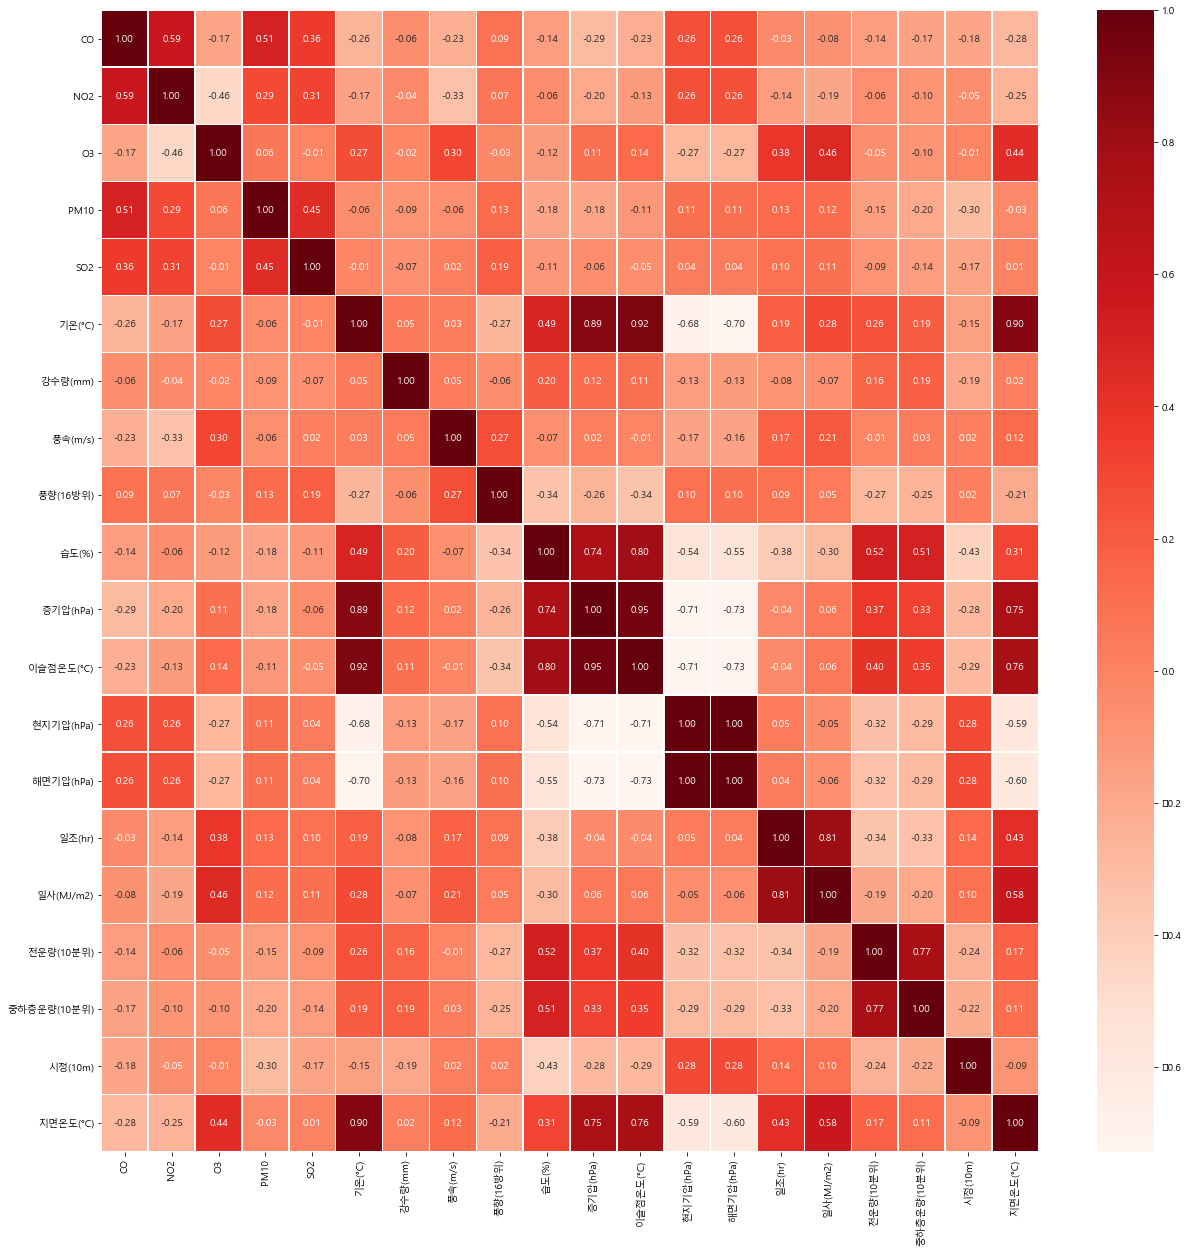

In [168]:
t=df1[['CO', 'NO2', 'O3', 'PM10', 'SO2', '기온(°C)', '강수량(mm)',
       '풍속(m/s)', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '시정(10m)', '지면온도(°C)']]
plt.figure(figsize=(21,21))
sns.heatmap(data = t.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')
# plt.savefig('heatmap.png')

# LSTM
### DataLoad

In [87]:
df = pd.read_csv('강서구.csv')
df = df.set_index('측정일시')

### Trainning

In [119]:
x = df[['CO', 'NO2', 'SO2', '풍향(16방위)', '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)',
       '시정(10m)']]
y=df[['PM10']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=156)

In [120]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
x_train_t = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [124]:
model = Sequential()
model.add(LSTM(340, activation='tanh', input_shape=(x_train.shape[1],1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

dust = model.fit(x_train_t, y_train, epochs=100, batch_size=30, verbose = 1)

Epoch 1/100
1871/1871 [==============================] - 56s 29ms/step - loss: 627.9576
Epoch 2/100
1871/1871 [==============================] - 56s 30ms/step - loss: 381.4543
Epoch 3/100
1871/1871 [==============================] - 57s 30ms/step - loss: 351.0316
Epoch 4/100
1871/1871 [==============================] - 56s 30ms/step - loss: 344.1840
Epoch 5/100
1871/1871 [==============================] - 56s 30ms/step - loss: 339.1823
Epoch 6/100
1871/1871 [==============================] - 56s 30ms/step - loss: 336.3777
Epoch 7/100
1871/1871 [==============================] - 56s 30ms/step - loss: 335.5471
Epoch 8/100
1871/1871 [==============================] - 56s 30ms/step - loss: 331.0479
Epoch 9/100
1871/1871 [==============================] - 56s 30ms/step - loss: 331.0361
Epoch 10/100
1871/1871 [==============================] - 57s 30ms/step - loss: 327.7855
Epoch 11/100
1871/1871 [==============================] - 56s 30ms/step - loss: 324.8397
Epoch 12/100
1871/1871 [======

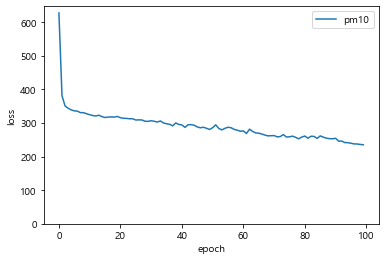

In [126]:
plt.plot(dust.history['loss'])
plt.ylim(0.0, )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['pm10'], loc='upper right')
plt.show()

### Result (TEST)

In [127]:
h_t = model.predict(x_test)

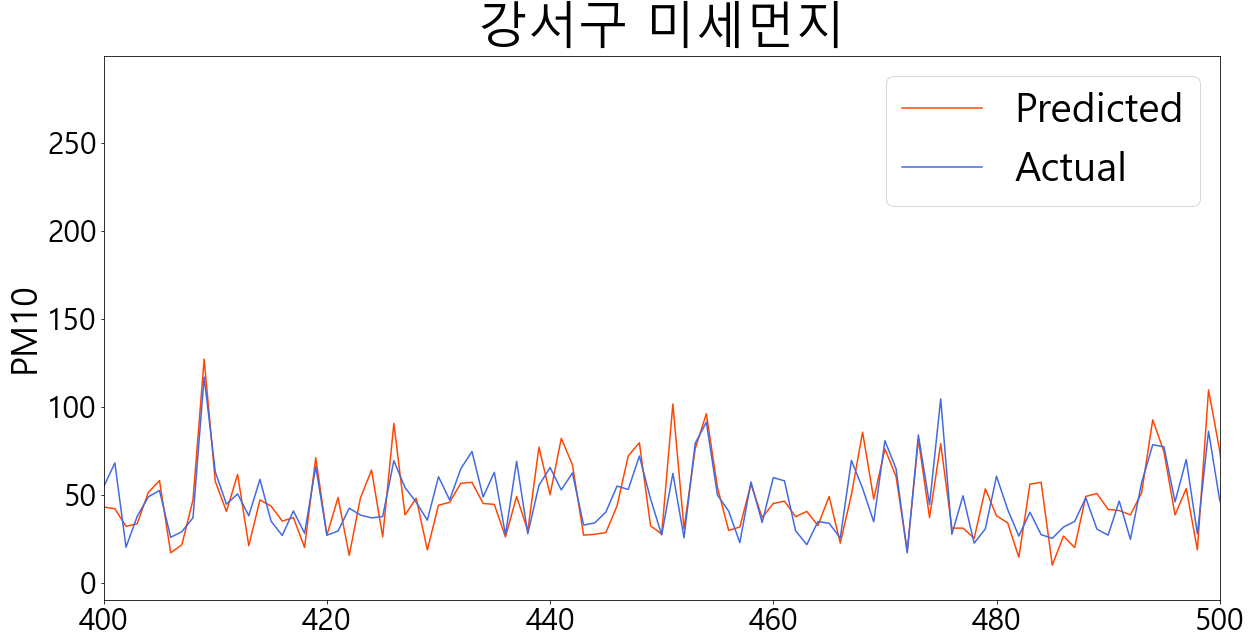

In [128]:
plt.figure(figsize=(20,10))
plt.plot(y_test, '#FF4500')
plt.plot(h_t, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)
plt.xlim(400, 500)
plt.title('강서구 미세먼지',fontsize = 50)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('PM10', fontsize = 35)
plt.show()

### Learning Result Save

In [129]:
model.save('강서구_최종.h5')